# Practicals for lecture 1.0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/practicals/Practicals_1.0.ipynb)

## Introduction to `numpy`

#### 1.0.0 Creating numpy arrays

In [2]:
import numpy as np

In [3]:
# Create a numpy array from this list:

my_list = [3,2,4,5,6,1]


In [5]:
# Initialize a 3D numpy array full of zeros of shape (3, 2, 10). 
# Check its  `ndim` and `shape` attributes to make sure it is correct!

my_array = np.zeros((3, 2, 10))
my_array.ndim
my_array.shape

(3, 2, 10)

In [6]:
# Initialize a numpy array full of ones of shape (3, 2, 10). Make it of data type np.uint16!
# Bonus: check its size in memory and compare it with the size of the zeros array we defined above

my_array = np.ones((3, 2, 10), dtype=np.uint16)


In [9]:
# Initialize an array of shape (3, 2, 10) full of nans:

my_array = np.ones((3, 2, 10))
my_array[:] = np.nan

In [11]:
# Initialize an array containing all even numbers from 0 to 100:
np.arange(0, 101, 2)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [15]:
# Google (or ask chatGPT) how to use np.random to generate normally distributed values. 
# Then, create an array of normally distributed values and shape (4,5,2) called random_matrix.

np.random.seed(42)  # with this line, we make sure the result is random but always the same when we run!

np.random.normal(0, 1, (4,5,2))

array([[[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473],
        [-0.46947439,  0.54256004]],

       [[-0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024],
        [-1.72491783, -0.56228753],
        [-1.01283112,  0.31424733],
        [-0.90802408, -1.4123037 ]],

       [[ 1.46564877, -0.2257763 ],
        [ 0.0675282 , -1.42474819],
        [-0.54438272,  0.11092259],
        [-1.15099358,  0.37569802],
        [-0.60063869, -0.29169375]],

       [[-0.60170661,  1.85227818],
        [-0.01349722, -1.05771093],
        [ 0.82254491, -1.22084365],
        [ 0.2088636 , -1.95967012],
        [-1.32818605,  0.19686124]]])

In [ ]:
# [Advanced]: 
# 1) Another useful np.random function is shuffle, to change the order of elements in a list/array. 
# try it out! Does it return anything or does it work inplace?

# 2) try initializing arrays of float type of different sizes; check their size in memory
# and try to figure out how much memory is required to store each number of the array, 
# and how much memory is allocated as an overhead just to initialize the array 

# 3) From the exercise above, you can imagine that sometimes using u/int8 or u/int16 can spare a lot of space
# when working with arrays. However, those types can only store integers. Can you imagine what you could do
# to store float values between 0 and 1 in a compressed format using uint16? write a function that takes
# as input an array of floats between 0 and 1 and convert it in uint16 format maintaning as much information
# as possible. Write also a function to transform the array back to the original float form.

# 4) Can you calculate how much error you are introducing when compressing an array in this way? 

#### 1.0.1 Indexing and plotting

In [5]:
import numpy as np
np.random.seed(42)

random_matrix = np.random.normal(0, 1, (4, 5))
random_matrix

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ]])

In [6]:
# use numpy indexing to address the element (0, 1) (first row, second column) from random_matrix above:

random_matrix[0, 1]

-0.13826430117118466

In [9]:
# use numpy indexing to select all values in the second row from random_matrix above:
random_matrix[1, :]

array([-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [ ]:
# Set to np.nan all the negative entries of the matrix below:
np.random.seed(42)
random_matrix = np.random.normal(0, 1, (3,2))



(145, 484)


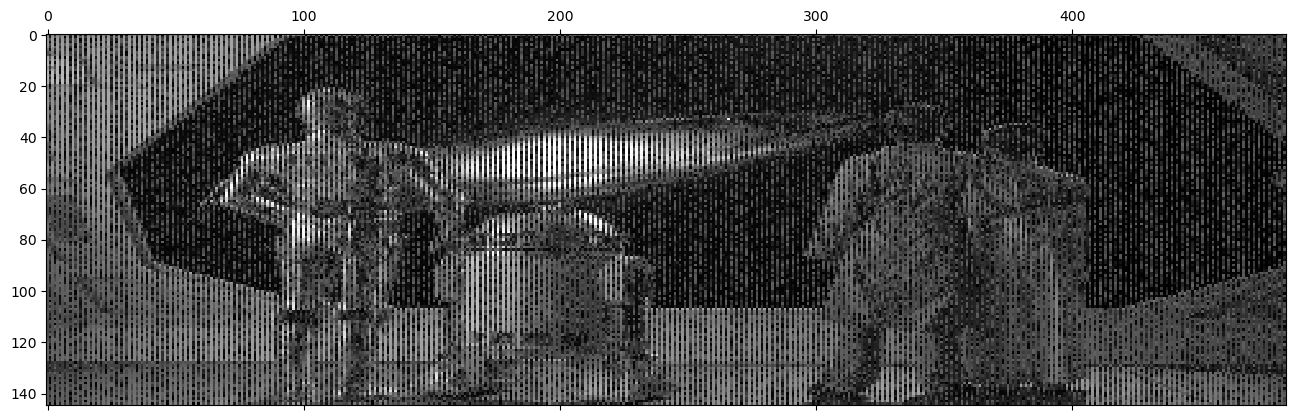

In [12]:
# Images are just arrays! This is one of the reasons working with arrays is so important!
# (Usually images are H x W x 3 arrays, with the third dimension storing the values
# for each of the RGB channels. Here the image will be grayscale and only 2D).

# Use the function below to download an image, and print the shape of the array to know the number of pixels. 
# Then, use plt.matshow to visualize it.

def fetch_image():
    """Fetch exercise data from github repo. 
    
    Returns:
        np.ndarray
            Array with the exercise data.
    
    """
    
    # You should never import stuff in a function! I'm doing it here
    # just to keep together all the code that you don't really need to read now.
    import numpy as np
    import requests
    from io import BytesIO

    # URL of the .npy file on GitHub:
    URL = "https://github.com/vigji/python-cimec/raw/main/practicals/data/corrupted_img.npy"

    response = requests.get(URL)
    
    return np.load(BytesIO(response.content))


# Tip 1: remember to import matplotlib.pyplot first - and give it an alias! ("import ... as ...")
# Tip 2: to make the image grayscale, you can pass the cmap="gray" argument to the matshow() function!

img = fetch_image()
print(img.shape)

from matplotlib import pyplot as plt
plt.matshow(img, cmap="gray")

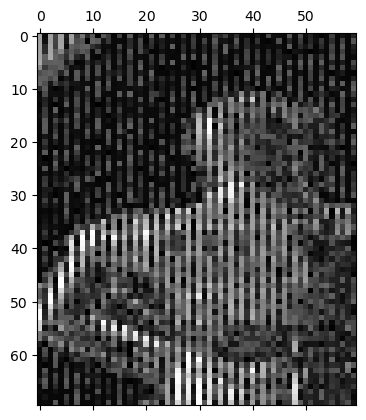

In [13]:
# It looks like the image got corrupted with some noise! 
# To understand the noise pattern, you can try to look closer to it.
# Zoom in the image: plot it again, but selecting a small region using indexing 
# (e.g., im_corr[10:80, 70:130])
plt.matshow(img[10:80, 70:130], cmap="gray")

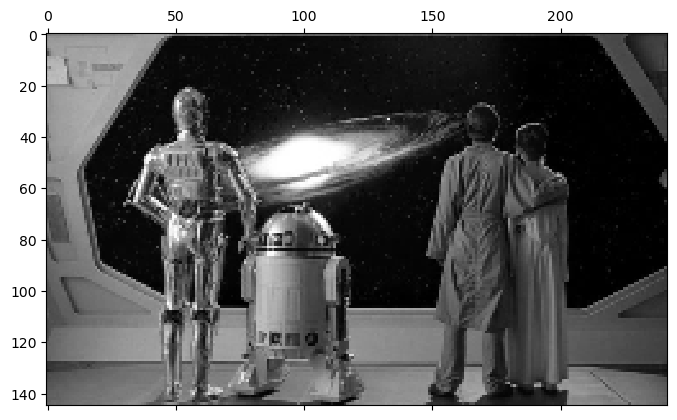

In [14]:
# Can you understand what is going on? Can you think of an indexing strategy 
# that would filter out the noise? (maybe excluding some entries...)
# Try to retrieve the uncorrupted image with an indexing operation, and plot it!

plt.matshow(img[:, ::2], cmap="gray")

In [ ]:
# [Advanced]
# 1) check the type of the image array. Then, check its maximum. Is this data represented efficiently?
#   If not, convert it to the format that would preserve information with the maximum memory efficiency

# 2) As we mentioned, color images are just (w, h, 3) arrays where the third dimension correspond to color.
# Color is represented by triplets of numbers indicating the load over the Red, the Blue, and the Green axis.
# Let's make a colored version of the image, where the left side of the image appears red, the center blue,
# and the right green!
# To do so, initialize an empty (w,h,3) array and use indexing to fill with the image values the correct
# channels in different parts of the image. Bonus points: do it with a loop.
# After you have done it, consider this question: were you working inplace or on copies?
